In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tangram as tg 
import numpy as np 

In [2]:
dataFolder='input_vizgen_liver/'

ad_spatial=sc.read(dataFolder+'Blank_genes_removed.csv').transpose()
ad_spatial.var_names_make_unique()
print(ad_spatial.shape) 


(395215, 347)


In [6]:
adata=sc.read_h5ad(dataFolder+'saveall_with_normalization')

In [4]:
coordinates = pd.read_csv(dataFolder+"tissue_positions_list.csv", index_col=0,header=None)
#counts = sc.read_csv("./pnas.1912459116.sd12.csv").transpose()
#adata_merfish = counts[coordinates.index, :]
ad_spatial.obsm["spatial"] = coordinates.to_numpy()


In [14]:
ad_spatial.obsm['X_pca']=adata.obsm['X_pca']
ad_spatial.obsm['X_umap']=adata.obsm['X_umap']
ad_spatial.uns['leiden']=adata.uns['leiden']
ad_spatial.uns['louvain']=adata.uns['louvain']
ad_spatial.uns['pca']=adata.uns['pca']
ad_spatial.uns['umap']=adata.uns['umap']
ad_spatial.obs['louvain']=adata.obs['louvain']
ad_spatial.obs['leiden']=adata.obs['leiden']


In [25]:
#load the already clusterd and cell type name file 

cluster= pd.read_csv(dataFolder+'leiden_cluster.dat',sep=',',index_col=0,header=0)
cluster=cluster.to_numpy()
ctname=pd.read_csv(dataFolder+'NameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
new_cluster_names=ctname[:,0]

ad_spatial.obs['knownClusters'] = cluster.astype(str)


print('ct name',new_cluster_names)

ct name ['Hep1' 'Hep2' 'Hep3' 'Hep4' 'Hep5' 'Hep6' 'LSEC1' 'Kupffer1'
 'DC_Monocytes' 'Hep7' 'Hep8' 'Stroma1' 'Hep9' 'LSEC2' 'Kupffer2' 'AEC'
 'EC_Stroma' 'Stroma2' 'Tcel_ILC' 'Chola1' 'DC' 'Chola2' 'Neutro' 'Hep10'
 'Macrop']


In [9]:
#it takes very long time to run so already saved one read in adata and copied into ad_spatial 

sc.pp.normalize_total(ad_spatial, inplace=True)
sc.pp.log1p(ad_spatial)

sc.pp.pca(ad_spatial)
sc.pp.neighbors(ad_spatial)
sc.tl.umap(ad_spatial)
sc.tl.leiden(ad_spatial, resolution=1.5)
sc.tl.louvain(ad_spatial,resolution=1.5)
ad_spatial.write_h5ad(dataFolder+'saveall')

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


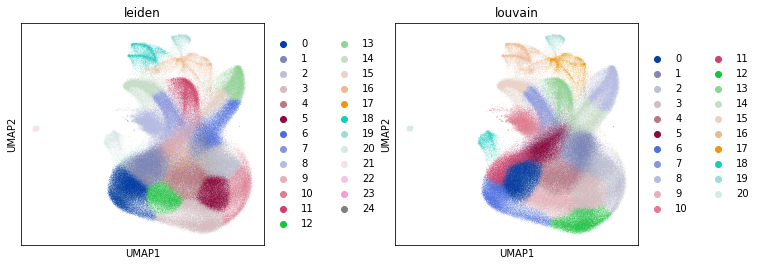

In [26]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ad_spatial, color=["leiden","louvain"], wspace=0.4,show=True, save='_spatial_leiden_louvain.png')

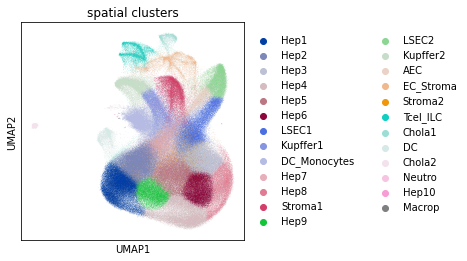

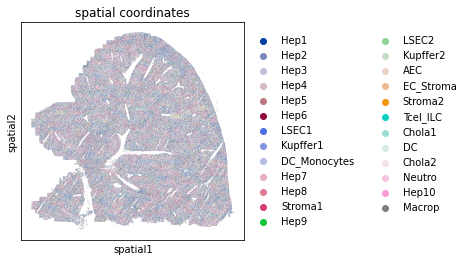

In [27]:
ad_spatial.obs['knownClusters'] = ad_spatial.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(ad_spatial, color="knownClusters",title='spatial clusters',show=True,save='_spatial_known_clusters.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters",title='spatial coordinates')

In [20]:
genename_spatial=ad_spatial.var_names.to_numpy()
genesum=np.sum(ad_spatial.X,axis=0)
genemean=np.mean(ad_spatial.X,axis=0)

index=np.argsort(-genesum)
#Top 20 gene sorted according to their mean expression in spatial data 
for i in range(20):
    print(genename_spatial[index[i]],genemean[index[i]])

Fasn 53.968254
Pck1 53.057026
Acsl1 34.544304
Serping1 30.610815
Cebpa 21.565184
Errfi1 21.016417
Sardh 20.654715
Egfr 19.981411
Alas1 18.477348
G6pc 15.871849
Aldh7a1 14.404613
Cyp2b9 14.40188
Hc 14.112013
Proz 14.052233
Cald1 13.439454
Cyp1a2 12.981375
Comt 12.450193
Aldh3a2 12.056339
Epas1 11.739625
Cyp2c23 11.654297


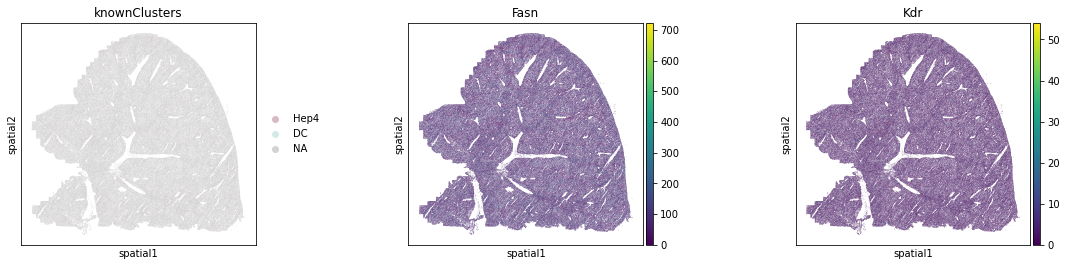

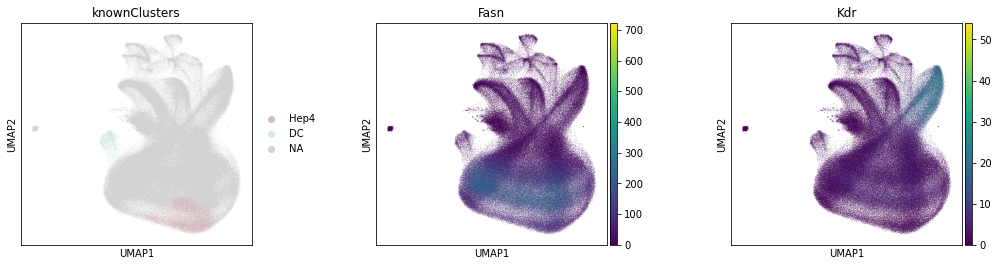

In [28]:
#plot genes and cell types on spatial data 
sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,
color=["knownClusters", "Fasn","Kdr" ],
groups=["Hep4", "DC"
])

sc.pl.umap(ad_spatial, color=["knownClusters", "Fasn","Kdr" ],
wspace=0.4,show=True,
groups=["Hep4", "DC"
])